In [1]:
from pair_of_lines import Pair_of_lines
from line import Line
from point import Point
from conic import Conic
import random

ModuleNotFoundError: No module named 'GeoPy2D'

In [2]:
def random_line_generator():
    sign = [-random.choice((-1000,1000)),random.choice(range(-1000,1000))]
    eq_type = [
        (
            random.choice(sign) *random.random(),
            random.choice(sign) *random.random()
        ),
        (
            random.choice(sign) *random.random(),
            random.choice(sign) *random.random(),
            random.choice(sign) *random.random()
        ),
        (
            random.choice(sign) *random.random(),
            random.choice(sign) *random.random(),
            random.choice(sign) *random.random(),
            random.choice(sign) *random.random()
        )          ]
    ch = random.choice(eq_type)
    if len(ch) == 2:
        m,c = ch
        line = Line(m = m, c = c)
    elif len(ch) == 3:
        a,b,c = ch
        line = Line(a = a, b = b, c = c)
    elif len(ch) == 4:
        x1,y1,x2,y2 = ch
        line = Line(points = (Point(x1,y1), Point(x2,y2)))
    if (line._a > 100000 and line._b > 100000 and line._c > 100000) or (line._a == 0):
        return random_line_generator()
    else:
        return line
    

In [3]:
random_line_generator()

659.0542127682169x - 1y + 6.156424875495334 = 0

In [4]:
import pandas as pd
df = pd.DataFrame(columns=('line1_a', 'line1_b','line1_c', 'line2_a', 'line2_b', 'line2_c', '_a', '_b', '_h', '_g', '_f', '_c'))
df

Empty DataFrame
Columns: [line1_a, line1_b, line1_c, line2_a, line2_b, line2_c, _a, _b, _h, _g, _f, _c]
Index: []

In [5]:
def process_dataframe(df):
    # Drop rows containing string values
    df = pd.DataFrame(df)
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coerce non-numeric values to NaN
    df = df.dropna()  # Drop rows with NaN (originally containing non-numeric values)

    # Reset index
    df = df.reset_index(drop=True)

    # Clip values in the DataFrame to be within the range of -10000 to 10000
    df = df.clip(lower=-100000000, upper=100000000)

    # Drop columns with values not in the range of -10000 to 10000
    df = df[~((df == -100000000) | (df == 100000000))].dropna()


    return df


In [7]:
while df.shape[0] != 100000:
    line1 = random_line_generator()
    line2 = random_line_generator()
    pair = Pair_of_lines(lines=(line1, line2))

    # Add data using loc
    df.loc[len(df)] = [
        line1._a, line1._b, line1._c, line2._a, line2._b, line2._c,
        pair._a, pair._b, pair._h, pair._g, pair._f, pair._c
    ]
    df = process_dataframe(df)
    
# Print the DataFrame
df.head()

KeyboardInterrupt: 

In [9]:
df.to_csv('mycsv.csv', index = False)

In [8]:
df

line1_a     line1_b     line1_c     line2_a     line2_b  \
0     250.667324    1.000000  636.312416  230.127284 -953.016053   
1     155.968382    1.000000  334.216738  243.497786   -1.000000   
2     160.541818 -282.759710   68.072945  716.382311  805.869457   
3     139.078273  203.746649  340.331508  312.870000   57.740000   
4     337.187011    3.727720  -33.707739  630.574870  977.833511   
...          ...         ...         ...         ...         ...   
2323  250.321632  776.012187  671.246216  246.925676  621.375566   
2324   67.488397    1.000000  205.784169  858.646181   -1.000000   
2325  316.942958    1.000000   63.307604  377.960000  238.880000   
2326    8.836011   -1.000000  179.715435   12.904570    1.000000   
2327  783.120876    1.000000  300.473285   46.406717    1.000000   

            line2_c             _a             _b             _h  \
0        763.115908   57685.390503    -953.016053 -119329.928151   
1         58.300263   37977.955630      -1.000000      43.764702   
2        598.579266  115009.318836 -227867.414258  -36594.153400   
3    -219091.101600   43513.419406   11764.331522   35888.296813   
4         72.675169  212621.656037    3645.089832  166031.682950   
...             ...            ...            ...            ...   
2323     626.448202   61810.838379  482195.012039  173580.540100   
2324    -421.528199   57948.654090      -1.000000     395.578892   
2325 -131607.643600  119791.760418     238.880000   38044.646907   
2326    -849.042572     114.024925      -1.000000      -2.034279   
2327     427.966912   36342.069077       1.000000     414.763797   

                _g            _f            _c  
0     1.688605e+05 -3.028264e+05  4.855801e+05  
1     4.523702e+04 -1.379582e+02  1.948492e+04  
2     7.243163e+04 -5.719810e+04  4.074705e+04  
3    -1.518217e+07 -2.230971e+07 -7.456360e+07  
4     1.624935e+03 -1.634482e+04 -2.449716e+03  
...            ...           ...           ...  
2323  1.612807e+05  4.516137e+05  4.205010e+05  
2324  7.412376e+04 -3.136562e+02 -8.674383e+04  
2325 -2.084409e+07 -5.824236e+04 -8.331765e+06  
2326 -2.591500e+03  5.143790e+02 -1.525861e+05  
2327  1.745469e+05  3.642201e+02  1.285926e+05  

[2328 rows x 12 columns]

In [25]:
coeff = df[["_a", "_b", "_h", "_g", "_f", "_c"]].iloc[0]
coe = df[['line1_a', 'line1_b', 'line1_c', 'line2_a', 'line2_b', 'line2_c']].iloc[0]


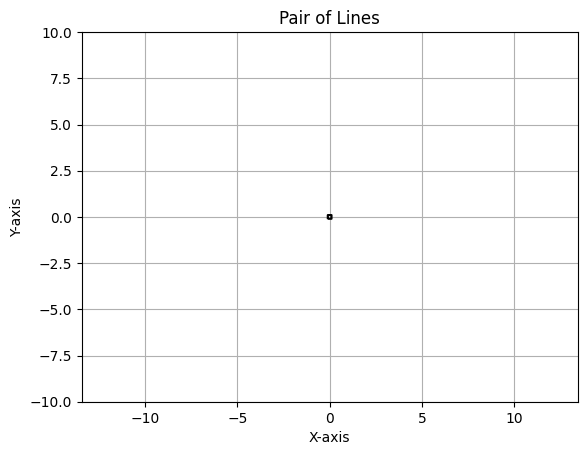

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Example coefficients for the pair of lines equation ax^2 + by^2 + 2hxy + 2gx + 2fy + c
a, b, h, g, f, c = 2,2,0,0,0,-0.0409

# Create a mesh grid of x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

# Calculate the pair of lines equation for each point in the mesh grid
equation = a * x**2 + b * y**2 + 2 * h * x * y + 2 * g * x + 2 * f * y + c

# Plot the contours of the equation
contour = plt.contour(x, y, equation, levels=[0], colors= random.choice(('red','green','blue','yellow','black')))
plt.axis('equal')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Pair of Lines')
plt.grid(True)
# Show the plot
plt.show()


In [26]:
a1,b1,c1,a2,b2,c2 = map(float,coe)

250.66732389088008x + 1.0y + 636.312416184912 = 0
230.12728427394597x - 953.0160528221954y + 763.115907670118 = 0


FileNotFoundError: [Errno 2] No such file or directory: 'static/line_plot.png'

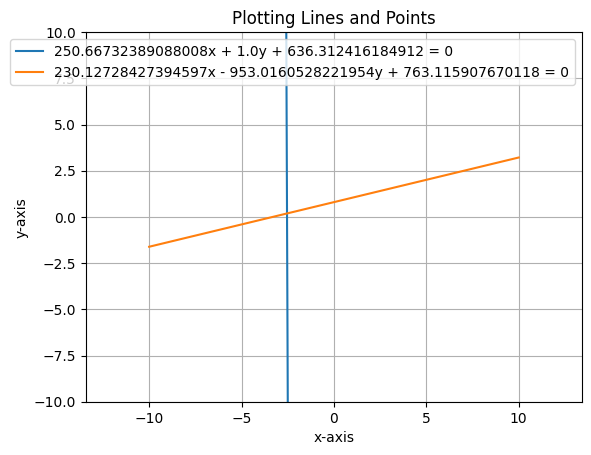

In [27]:
Line.plot(Line(a = a1, b = b1, c = c1),Line(a = a2, b = b2, c = c2) )